In [442]:
from __future__ import division, unicode_literals, print_function  # for compatibility with Python 2 and 3

import matplotlib as mpl 
import matplotlib.pyplot as plt
from matplotlib import rc
from matplotlib.animation import FuncAnimation

%matplotlib inline

# Optionally, tweak styles.
mpl.rc('figure',  figsize=(10, 5))
import numpy as np
import pandas as pd
from pandas import DataFrame, Series  # for convenience
import os
import seaborn as sns
# equivalent to rcParams['animation.html'] = 'html5'
rc('animation', html='html5')
import pims
import pySPM as spm 
import trackpy as tp
import glob
from sxmreader import SXMReader

In [682]:
n_range = range(983, 984)
N = len(n_range)
SXM_PATH = ["electromigration_6/Image_{0:03}.sxm".format(i) for i in n_range]
frames = SXMReader(SXM_PATH)
molecule_size = 11
min_mass = 2
max_mass = 10
min_size = 1
max_ecc = 1
separation = 5
searchRange = 25
# def gray(image):
#     return image[:, :, 1] * 0.7152 + image[:, :, 0] * 0.2126 + image[:, :, 2] * 0.0722# Take just the green channel

# frames = gray(pims.open('test-01.png')[0])

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


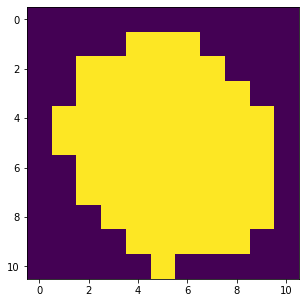

In [683]:
%load_ext autoreload
%autoreload 2
f = tp.locate(frames[:], diameter=molecule_size, minmass=min_mass, separation=separation, smoothing_size=31)

<Figure size 720x360 with 0 Axes>

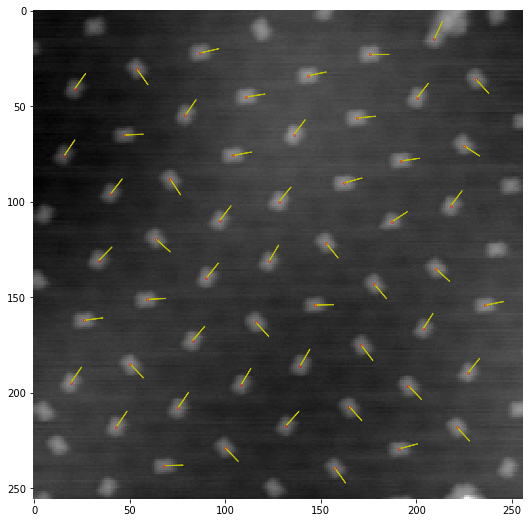

In [684]:
plt.figure()

fig=plt.figure(figsize=(12, 9))
ax1=plt.axes(xlim=(0, 256), ylim=(0, 256), frameon=False)
ln, = ax1.plot([], [], lw=3)
tp.annotate(f, frames[0], plot_style={'markersize': 0.5}, ax=ax1)
R = 10
for i in range(len(f)):
    tmp = f.iloc[i]
    plt.arrow(tmp.x, tmp.y, R * np.cos(tmp.orientation), R * np.sin(tmp.orientation), color='y')

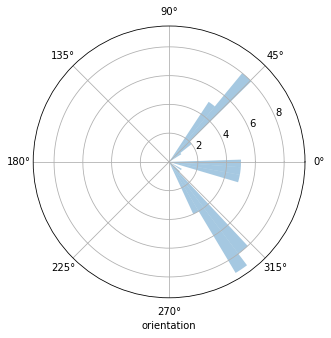

In [699]:
fig, ax = plt.subplots(subplot_kw={'projection': 'polar'})
sns.distplot(f.orientation, kde=False, bins=20)